# Density Estimation Techniques
In this lab, you will implement the density estimation techniques we studied in the lecture. 

## Lab Instructions:
1. Read the explanation above each requirement very well
2. Read the requirement very well before jumping into the code.
3. Some requirements have essay questions in them, make sure you do NOT miss them.
4. PLEASE Read the hints! They are clear and made to help you complete the requirement as fast as you should

## About the Lab
This lab consists of one requirement: [Requirement 1](#Requirement-1) where you implement one of the density estimation methods.

- Refer to the slides whenever you need an equation or a formula. 
- In this lab, you are free to choose your bump function. However, higher accuracies will get a higher grade. <br/>**You will need to justify your choice of that bump function, write that in your own words, do not copy from your colleagues**
- Feel free to use code from Lab 3. 

------------------
## Density Estimation

### Recap

In the previous lab, we were introduced to the problem of classification of multivariate data, and we applied Bayes classifier to classify these points. 

The Bayes classification rule depends mainly on the class-conditional probability (also known as the class density or class distribution). An accurate method to calculate this distribution is crucial for improving the performance of the classifier. 

We built our classifier based on the assumption that this data is multivariate Gaussian random distribution, and we estimated the mean and covariance of this distribution. Finally, a test vector x is classified as (i.e. assigned) the class that maximizes the posterior probability:

$P(C_i|x_{test}) = \frac{P(x_{test}|C_i) * P(C_i)}{P(x_{test})}$

Classification of $x_{test}$ = $argmax_{i} P\big(C_i|x_{test}\big)$ = $argmax_{i} P(x|C_i) * P(C_i)$

* $P(C_i|x_{test})$: Posterior probability
* $P(x|C_i)$: Class-conditional probability (or distribution)
* $P(C_i)$: Class apriori probability
                
**Note that** $P(C_i|x_{test}) \neq P(x_{test}|C_i) * P(C_i)$. Instead,  $P(C_i|x_{test}) = \frac{P(x_{test}|C_i) * P(C_i)}{P(x_{test})}$. However, when we compare multiple classes, the denominator $P(x_{test})$ is independent of the class $i$ and can be regarded as normalizing factor.


Where $P(x|C_i)$ is given by the multivariate Gaussian random distribution:

$P(x|C_i) = \mathcal{N}(x; \mu_i, \Sigma_i) = \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma_i|^{\frac{1}{2}}} exp\big(\frac{-1}{2}(x-\mu_i)^T\Sigma^{-1}_{i}(x-\mu_i)\big)$


 ### In this lab
We will drop off the assumption that $P(x|C_i)$ is drawn out of a Gaussian distribution with mean $\mu$ and covariance $\Sigma$. The distribution is not necessarily Gaussian, yet we will still apply Bayes classifier to classify between data points by assigning each point to the class that maximizes its posterior probability as usual.

#### What will change in Bayes classifier under the new assumption?
We will answer that for you! $P(x|C_i)$ is no longer equal to the Gaussian distribution as shown
in the previous equation i.e. we can’t use the Gaussian formula to substitute for $P(x|C_i)$.

#### How will we figure out the unknown distribution (also known as likelihood function)?
We will answer that for you too! There are three ways for doing so:

    1. Histogram Analysis.
    2. Naïve Estimator.
    3. Parzen Window Density Estimator.
    
All these techniques aim to estimate a density function $P(x|C_i)$ for the training points, and hence you can use the density function to apply Bayes classifier and classify your test points.
*Refer to the slides to get a brief about these techniques.*

## Requirement 1

You are given files **data.csv**, **test_data.csv**, and  **test_data_true.csv**. 

**The first file** contains a list of one-dimensional data points and their corresponding classes. The data points were drawn of the
 distribution shown in Figure 1 (NOTE: It will be your task to estimate this distribution).
 
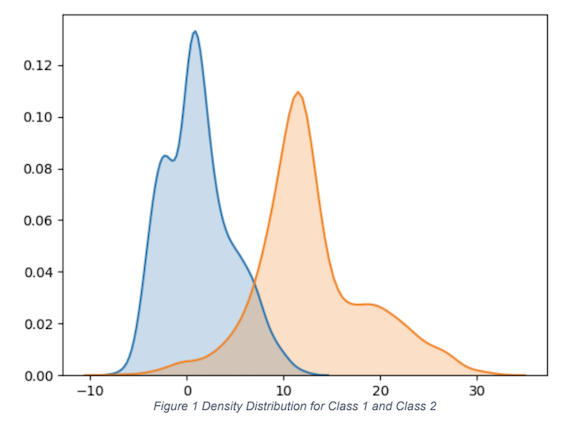

As shown in Figure 1, the points belonging to class 1 were drawn out of the distribution in blue,
whereas the points belonging to class 2 were drawn out of the distribution in red.

After applying Parzen Window Density Estimator and plotting the estimated distribution for
both classes, you should observe a similar distribution for each class to the corresponding
distribution shown in Figure 1.

The format of data files is shown in the following table:

||Class|Value|
|-|-|-|
|Point#1| 1| 5.34|
|Point#2| 2| 2.73|
|Point#3| 2| -1.832|

**The second file** contains test points without the associated classes. 

The true values for test
points are found in *test_data_true.csv*.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

**The first step** is to read and import the training data, test data and the true values for the test data,
found in the given files respectively.

In [30]:
def read_data():
    # TODO 1: Read the file 'data.csv' into the variable data.
    #        Convert the matrix data into numpy array and make sure that the values in data is float and not strings.
    # Hint: You already implemented it in Lab 3.
    # Hint: use data = np.asarray(data)
    # Note: data contains both the training data together with labelled classes.

    data = np.asarray( pd.read_csv("data.csv", sep = ',', header= None))

    return data



In [31]:
def read_test_data():
    # TODO 2: Read the file 'test_data.csv' and 'test_data_true.csv' into the variables test_data and test_data_true.
    #         Convert the matrix data into numpy arrays and make sure that the values in data is float and not strings.
    # Hint: You already implemented it in Lab 3.
    # Note: test_data contains the unlabelled test class.
    # Note: test_data_true contains the actual classes of the test instances, which you will compare
    #       against your predicted classes.
    test_data =  np.asarray(pd.read_csv("test_data.csv", sep = ',', header= None))
    test_data_true = np.asarray(pd.read_csv("test_data_true.csv", sep = ',', header= None))
    
    return test_data, test_data_true


In [32]:
data = read_data()
test_data, test_data_true = read_test_data()

**The second step** is to choose a suitable bump function (Parzen window), and find the optimal value of `h`
for the bump function for each class.

First, fill in the function `calculate_h_optimal()`. Pass the convenient parameters.

In [33]:
# Note: Pass the suitable parameters
def calculate_h_optimal(class_data, N, M):
    sigma = np.std(class_data)
    h = sigma * ((4.0/((N + 2) * M)) ** (1.0/ (N + 4)))
    # TODO 3: Calculate the optimal value for the bandwidth (h) of Parzen window (or the bump function you are going
    #  to compute). Pass the suitable parameters. 
    # Hint: Refer to the slides to find out the equation of computing h optimal and know which parameters you should pass.
    return h

Second, implement the bump function (i.e. Parzen window). You should compute
the bump function for any x, given a point p and an optimal value for h.

Y = F(x), where x represents the domain of the function or equivalently some
values to compute the bump function at, y represents the output of the bump
function and F represents the bump function.

**Notes:** You should vectorise this (i.e. your function should work if x were a single data point or a vector of M data points).


In [34]:
def bump_function(point, x, h):
    
    # TODO 4: Implement the bump function phi(x) at point p with bandwidth h. Note that x can be a scalar or a vector.
    # NOTE: Your solution should be vectorized.
    f = np.exp( -np.subtract(x, point)**2 / (2*h**2)) / (np.sqrt(2 * np.pi) *h)
    
    return f

**Question 1** What are the criteria of choosing bump function?

In [35]:
'''
    Your Answer:
    The bump function must be in the form  𝝓𝒉=𝒈(𝑿/𝒉) / h
    the integral of the bump function over ]-∞, ∞[ must be equal to 1
    the gaussian kernel satisfies those conditions
'''

'\n    Your Answer:\n    The bump function must be in the form  𝝓𝒉=𝒈(𝑿/𝒉) / h\n    the integral of the bump function over ]-∞, ∞[ must be equal to 1\n    the gaussian kernel satisfies those conditions\n'

**Question 2** Justify why you choose that as your bump function. Do you expect it to enhance accuracy? Why? 

Write everything you would like to say

In [1]:
'''
    Your Answer:
    I chose the bump function as gaussian function with standard deviation = h
    The gaussian kernel should be more accurate than a naïve estimator or a historgram analysis one, since it gives more weight to the point it's centered around,
    and less weight to the points that are further away from it.
    Other implementations might be more accurate, I've tried quite a few ones but this is the one that's worked best.
    
'''

"\n    Your Answer:\n    I chose the bump function as gaussian function with standard deviation = h\n    The gaussian kernel should be more accurate than a naïve estimator or a historgram analysis one, since it gives more weight to the point it's centered around,\n    and less weight to the points that are further away from it.\n    Other implementations might be more accurate, I've tried quite a few ones but this is the one that's worked best.\n    \n"

**At this point,** you need to iterate over the training points and apply the bump
function for every training point.\
The density estimate will be the accumulation (i.e. the sum) of the output of these bump functions.

We first need to generate the x vector which represents the possible values for the one
dimensional feature we have. You can find the minimum and maximum possible values for x among the training data, and generate a range of points which will represent your one-dimensional axis.

                            x = np.linspace(min_x, max_x, number_of_axis_points)
                            
Here, `min_x` represents the minimum value for the feature x, `max_x` represents the
maximum value for the feature x, and `number_of_axis_points` represents the
resolution of the scale (or how many points should be included between these two
limits).

In [37]:
# TODO 5: Construct x-axis that will be used in density estimation.
data = read_data()
min_x = np.min(data[:, -1])
max_x = np.max(data[:, -1])
number_of_axis_points = 10000
x = np.linspace(min_x, max_x, number_of_axis_points)

Now we need to compute the desnsities for each class. Remember that the density estimate represents `P(x|Ci)`

We start by computing h_optimal for each class we have:

In [38]:
# TODO 6: Calculate the optimal h for each class. 
# (Warning: Do not use for loops. Use vectorization, broadcasting and masking).
N = np.unique(np.array(data[:, 0]))

class_1_data = np.array(data [ data[:, 0] == 1 ][:, 1])
class_2_data = np.array(data [ data[:, 0] == 2 ][:, 1])
h1 = calculate_h_optimal(class_1_data, 1, len(class_1_data)  )
h2 = calculate_h_optimal(class_2_data, 1, len(class_2_data)  )

print( len(class_1_data),  len(class_2_data))
print(h1, h2)


1000 1500
0.919104761156659 1.3969632469283293


We then use these h_optimals to calculate the density functions:

In [39]:
# TODO 7: Calculate the probability density function p(x|C1) and p(x|C2) for each value on the constructed x-axis

pxgivenC1 =  np.sum( np.array( [ bump_function(point, x, h1)  for point in class_1_data] ), axis = 0 )  / len(class_1_data)#class 1
pxgivenC2 =  np.sum( np.array( [ bump_function(point, x, h2)  for point in class_2_data] ), axis = 0 )  / len(class_2_data)#class 2


print(pxgivenC1.shape)

(10000,)


Now we need to visualize how well are we estimating the densities.\
Let's plot the density estimates for the two classes that we computed in **ONE PLOT** with **DIFFERENT
COLORS.** This is an ordinary plot.

**Check your plot result**:\
Is it similar to Figure 1? If yes, proceed to question 5. If no, unfortunately you have
done something wrong. Think: Do you need another bump function? Do you need more points? 

**FAQ:** What do you mean by two classes in one plot with different colors?\
Answer: The two classes are overlaid together in one plot (such as Figure 1) with
different colors (red and blue). We can’t be any more specific :")

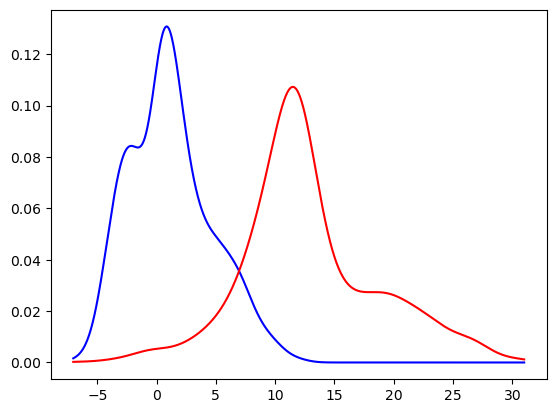

In [40]:
# plot the estimated densities
# TODO 8: Plot the two densities P(x|C1) and P(x|C2) on the same plot. use plt.plot(..)
plt.plot(x, pxgivenC1, 'b', x, pxgivenC2, 'r')
plt.show()

It’s time to classify the test points. You know what to do already! Given the points in
the test file, it’s required to classify each point whether it belongs to class 1 or 2 by
applying Bayes classifier. Report the accuracy of your classifier by comparing with
the true values found in the third file.

Hint: It’s not as easy as it looks like, there’s a trick here. Be creative in your solution.
Solutions may differ in this part, and this may lead to varying accuracies between
students.\
*May the odds be in your favor and you get the highest accuracy!*

In [41]:
# TODO 9: Calculate the aprior probabilities p(C1) and p(C2).
pc1 = len(class_1_data) / len(data)
pc2 = len(class_2_data) / len(data)

print(pc1, pc2)

0.4 0.6


In [42]:
pxgivenC1# TODO 10: Calculate the posterior probabilities p(C1|x) and p(C2|x) for all values in x.
pc1GivenX = pxgivenC1 * pc1 
pc2GivenX = pxgivenC2 * pc2

print(pc1GivenX, pc2GivenX)


[6.46181902e-04 6.49717171e-04 6.53271923e-04 ... 6.58318846e-97
 6.04367604e-97 5.54828333e-97] [0.00013902 0.00013929 0.00013956 ... 0.00072097 0.00071949 0.000718  ]


In [43]:
def find_nearest(array, value):
    '''
    This function finds which element in array is equal to value. If not found, it returns the nearest (or closest)
    element in the array to value.
    :param array: An array of values to search in.
    :param value: A value to select from the array.
    :return: The index of the found element in the array. If not found, it returns the index of the closest element.
    '''
    ## DO NOT Change Code ##
    array = np.asarray(array)
    index = (np.abs(array - value)).argmin()
    return index

In [44]:
# TODO 11: Compute the accuracy of your classifier.
accuracy = 0
for idx, point in enumerate(test_data):
    nearest = find_nearest(x, point)
    p1 = pc1GivenX[nearest]
    p2 = pc2GivenX[nearest]
    classification = 1.0 if (p1>p2) else 2.0
    if classification == test_data_true[idx]:
        accuracy+=1
    print("for point:", point, "the classification: ", classification)

accuracy = accuracy / len(test_data) *100



for point: [11.23317053] the classification:  2.0
for point: [17.05956066] the classification:  2.0
for point: [20.] the classification:  2.0
for point: [-3.1319357] the classification:  1.0
for point: [8.80189039] the classification:  2.0
for point: [6.] the classification:  1.0
for point: [0.14068925] the classification:  1.0
for point: [3.00817328] the classification:  1.0
for point: [5.] the classification:  1.0
for point: [1.45768636] the classification:  1.0
for point: [23.] the classification:  2.0
for point: [2.47872809] the classification:  1.0
for point: [-2.89862058] the classification:  1.0
for point: [2.88643351] the classification:  1.0
for point: [10.98552329] the classification:  2.0
for point: [10.50195166] the classification:  2.0
for point: [21.09271188] the classification:  2.0
for point: [0.75791643] the classification:  1.0
for point: [-4.01268405] the classification:  1.0
for point: [-2.83807276] the classification:  1.0
for point: [13.21236831] the classificatio

In [45]:
print("Accuracy = ", accuracy, "%")

Accuracy =  91.0 %


## Improvement


In [46]:

def local_bandwidth(data_, h):
    n = data_.shape[0]  # number of data points
    bandwidths = np.zeros(n)

    for i in range(n):
        # Compute the distance to all other data points
        distances = np.abs(data_ - data_[i])
        # Compute the local variance of the data within the distance h
        local_data = data_[distances <= h]
        local_n = local_data.shape[0]
        if local_n > 1:
            local_variance = np.var(local_data)#, ddof= 1)
            
        else:
            local_variance = 1.0

        # Compute the local bandwidth using the local variance
        bandwidths[i] = h * (4 * local_variance / 3) ** 0.2

    return bandwidths


In [47]:
h1_local = local_bandwidth(class_1_data, h1)
h2_local = local_bandwidth(class_2_data, h2)
pxgivenC1_improved =  np.sum( np.array( [ bump_function(class_1_data[i], x, h1_local[i] if  h1_local[i] != 0 else 1 )  for i in range(len(class_1_data))] ), axis = 0 )  / len(class_1_data)#class 1
pxgivenC2_improved =  np.sum( np.array( [ bump_function(class_2_data[i], x, h2_local[i] if  h2_local[i] != 0 else 1 )  for i in range(len(class_2_data))] ), axis = 0 )  / len(class_2_data)#class 1



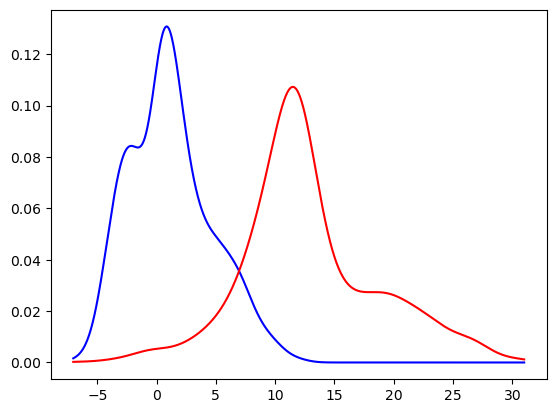

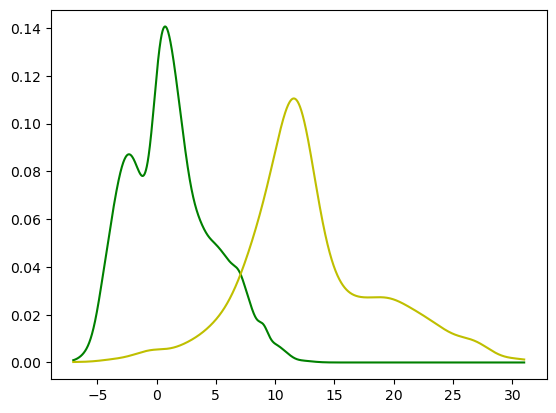

In [48]:
# plot the estimated densities
# TODO 8: Plot the two densities P(x|C1) and P(x|C2) on the same plot. use plt.plot(..)
plt.plot(x, pxgivenC1, 'b', x, pxgivenC2, 'r')
plt.show()
plt.plot(x, pxgivenC1_improved, 'g', x, pxgivenC2_improved, 'y')
plt.show()


![](https://media.tenor.com/images/dc3d0b907c2ce57176bf1b568893e1de/tenor.png)



In [49]:
pc1GivenX_improved = pxgivenC1_improved * pc1 
pc2GivenX_improved = pxgivenC2_improved * pc2

print(pc1GivenX, pc2GivenX)

[6.46181902e-04 6.49717171e-04 6.53271923e-04 ... 6.58318846e-97
 6.04367604e-97 5.54828333e-97] [0.00013902 0.00013929 0.00013956 ... 0.00072097 0.00071949 0.000718  ]


In [50]:
# TODO 11: Compute the accuracy of your classifier.
accuracy_improved = 0
for idx, point in enumerate(test_data):
    nearest = find_nearest(x, point)
    p1 = pc1GivenX_improved[nearest]
    p2 = pc2GivenX_improved[nearest]
    classification = 1.0 if (p1>p2) else 2.0
    if classification == test_data_true[idx]:
        accuracy_improved+=1
    print("for point:", point, "the classification: ", classification)

accuracy_improved = accuracy_improved / len(test_data) *100



for point: [11.23317053] the classification:  2.0
for point: [17.05956066] the classification:  2.0
for point: [20.] the classification:  2.0
for point: [-3.1319357] the classification:  1.0
for point: [8.80189039] the classification:  2.0
for point: [6.] the classification:  1.0
for point: [0.14068925] the classification:  1.0
for point: [3.00817328] the classification:  1.0
for point: [5.] the classification:  1.0
for point: [1.45768636] the classification:  1.0
for point: [23.] the classification:  2.0
for point: [2.47872809] the classification:  1.0
for point: [-2.89862058] the classification:  1.0
for point: [2.88643351] the classification:  1.0
for point: [10.98552329] the classification:  2.0
for point: [10.50195166] the classification:  2.0
for point: [21.09271188] the classification:  2.0
for point: [0.75791643] the classification:  1.0
for point: [-4.01268405] the classification:  1.0
for point: [-2.83807276] the classification:  1.0
for point: [13.21236831] the classificatio

In [51]:
print("Accuracy = ", accuracy_improved, "%")


Accuracy =  91.0 %


![](https://i.pinimg.com/736x/f1/19/1d/f1191dd0aa05fad4c33c92e23dbdb174.jpg)